In [10]:

# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from pywt import wavedec
from pywt import waverec
from scipy.signal import hilbert
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pywt import *
import random
import sys
import warnings
warnings.filterwarnings('ignore')



In [11]:
sys.path.insert(0, "D:\Arai4_Projects\spinwise_project\spinewise_amanuel\ML_Project\preprocessing")

In [12]:
# import modules
from filter import apply_hilbert_filter
from filter import apply_haar_filter
from pca import apply_pca
from pca import determine_n_clusters
from segmentation import apply_segemntation
from sax import apply_symbolic_aggregation
from viz import viz_data
from viz import viz_output
from viz import viz_bar
from viz import viz_score
from get_data import load_file
from model import kmeans
from model import db_scan
from Single_File_SAX import single_df_SAX  
from get_path import get_file_name






In [13]:
def start_cluster(file_type, file_name, features, preprocesses, model, number_cluster, y):
    """ initiate clustering """
    
    print("++++++++++ clustering initiated ++++++++++++++")
    print(f"file type : {file_type}")
    print(f"file name: {file_name}")
    print(f"features selected: {features}")
    print(f"Preprocessors selected: {preprocesses}")
    print(f"model selected: {model}")


    data = load_file(file_name, file_type)
    print("+++++++++++++++ data loaded +++++++++++++++++")
    print(f"size of data: {data.shape}")
    features_copy = features.copy()
    data_copy = data.copy()

    features_copy.append('ts_n')
    data = data[features]
    viz_data(data,features, "Selected features vs time")

    global cluster
    print("++++++ data preprocessing started +++++++++++++++++")
    for  preprocess in preprocesses:

        if preprocess == "filter": 
            data, features = apply_haar_filter(data, features)
            print("+++++++++ haar_filters applied +++++++++++++++")
            print(data.columns)
            viz_data(data, features,'Output of Haar Filter')

        elif preprocess == "sax":
            data, features = single_df_SAX(data, features)
            print("+++++++++ symbolic aggregation applied ++++++++")
            print(data.columns)
            viz_output(data,"SAX_vector","Output of SAX", y)

        elif preprocess == "segementation":
            continue

        elif preprocess == "pca":
            data, features = apply_pca(data,features, 2)
            print("++++++++++++++ pca applied ++++++++++++++++++++")
            print(data.columns)
            viz_data(data, features,'Output of PCA')

        else:
            continue

    data_k = determine_n_clusters(data,features)
    viz_score(data_k, "Silhouette Score vs k ")

    if model == "k_means":
        cluster = kmeans(data[features], number_cluster)
        print("+++++++++++++ kmeans cluster trained ++++++++++")

    elif model == "db_scan":
        cluster = db_scan(data[features], number_cluster)
        print("++++++++++++ db_scan cluster trained ++++++++++")

    data['cluster'] = cluster.labels_
    return data, data_copy


In [14]:
def user_input(file_type, file_name,features, preprocesses, model, number_cluster, y):
    """take input from a user
    """  

    data,data_copy = start_cluster(file_type, file_name, features, preprocesses, model, number_cluster,y)
    viz_output(data,'cluster','Output of Clusterng', y)
    
    if file_type == "labeled":
        viz_output(data_copy,'label','Labeled Clusters',y)
        data['label'] = data_copy['label']
        viz_bar(data, 'Clusters vs Labels')


    return data



In [15]:
unlabeled_files = get_file_name('unlabeled')
labeled_files = get_file_name('labeled')
labeled_files

['AW01-HBS-COMBINED-2022-11-8-14-16-48-1667918184-v1.4.3+lucina-buzz.csv',
 'CG01-PVH-COMBINED-201-1-1-3-54-50-1668712336-v1.4.3+lucina-buzz-to-nobuzz.csv',
 'EJ01-654-COMBINED-2022-12-9-14-30-4-1670607188-v1.4.2+lucina-buzz.csv',
 'IVH1-HS1-COMBINED-201-1-1-6-47-25-1671121115-v1.4.2+lucina-buzz.csv',
 'JS01-PVH-COMBINED-201-1-1-4-35-3-1668712665-v1.4.3+lucina-buzz-to-nobuzz.csv',
 'JVB1-HBS-COMBINED-2022-11-8-16-53-52-1667975897-v1.4.3+lucina-buzz.csv',
 'LC01-PVH-COMBINED-201-1-1-4-12-9-1668712469-v1.4.3+lucina-buzz-to-nobuzz.csv',
 'LVH1-654-COMBINED-201-1-1-3-20-36-1670595160-v1.4.2+lucina-buzz.csv',
 'MER-NC1-COMBINED-201-1-1-9-30-1-1668685895-v1.4.3+lucina-buzz.csv',
 'MYR-NC1-COMBINED-201-1-1-9-49-33-1668690240-v1.4.3+lucina-buzz.csv',
 'NC1-NC1-COMBINED-201-1-1-8-15-34-1668685019-v1.4.3+lucina-buzz.csv',
 'NVH1-HS1-COMBINED-201-1-1-7-10-54-1671121306-v1.4.2+lucina-buzz.csv',
 'NVL1-654-COMBINED-2022-12-9-16-10-6-1670608300-v1.4.2+lucina-buzz.csv',
 'OW01-HS1-COMBINED-201-1-1-7-

++++++++++ clustering initiated ++++++++++++++
file type : labeled
file name: AW01-HBS-COMBINED-2022-11-8-14-16-48-1667918184-v1.4.3+lucina-buzz.csv
features selected: ['acc_x_n', 'acc_z_n', 'acc_y_n']
Preprocessors selected: ['filter', 'pca', 'sax']
model selected: k_means
+++++++++++++++ data loaded +++++++++++++++++
size of data: (8925, 42)


<Figure size 640x480 with 0 Axes>

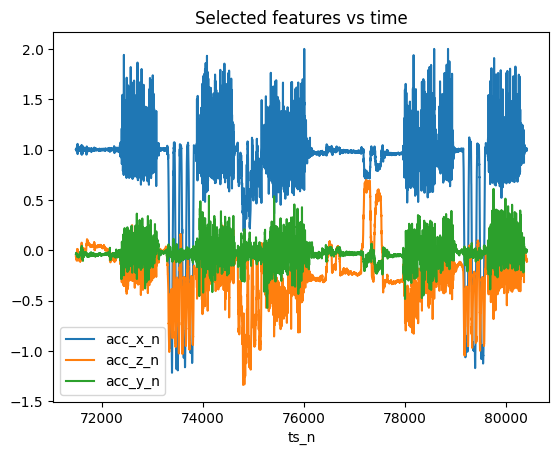

++++++ data preprocessing started +++++++++++++++++
+++++++++ haar_filters applied +++++++++++++++


<Figure size 640x480 with 0 Axes>

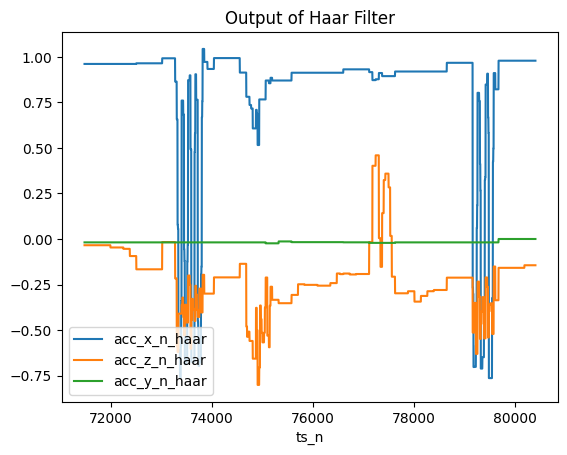

++++++++++++++ pca applied ++++++++++++++++++++


<Figure size 640x480 with 0 Axes>

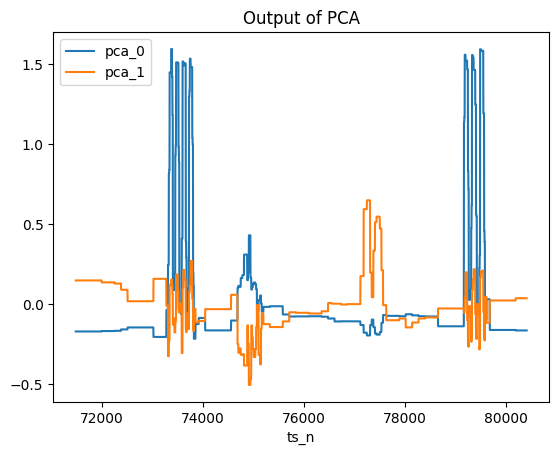

+++++++++ symbolic aggregation applied ++++++++


<Figure size 640x480 with 0 Axes>

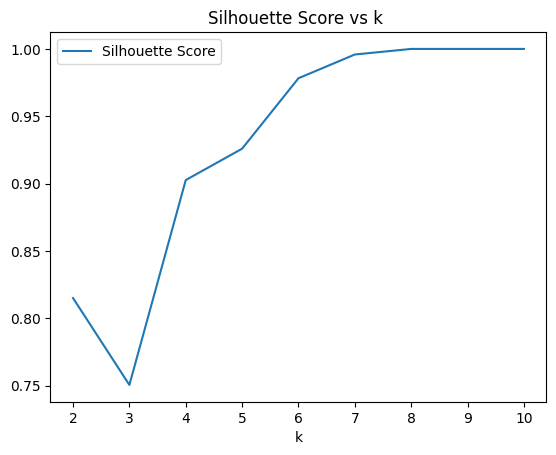

+++++++++++++ kmeans cluster trained ++++++++++


,acc_x_n,acc_z_n,acc_y_n,ts_n,acc_x_n_haar,acc_z_n_haar,acc_y_n_haar,pca_0,pca_1,SAX_vector,cluster,label
0,1.004883,-0.059082,-0.036865,71483.0,0.961159,-0.034223,-0.018585,-0.170666,0.148138,0.157311,3,staan
1,1.004639,-0.062256,-0.034424,71484.0,0.961159,-0.034223,-0.018585,-0.170666,0.148138,0.157311,3,staan
2,1.001221,-0.064697,-0.031738,71485.0,0.961159,-0.034223,-0.018585,-0.170666,0.148138,0.157311,3,staan
3,1.004395,-0.067383,-0.029541,71486.0,0.961159,-0.034223,-0.018585,-0.170666,0.148138,0.157311,3,staan
4,1.005615,-0.065674,-0.031494,71487.0,0.961159,-0.034223,-0.018585,-0.170666,0.148138,0.157311,3,staan


In [16]:
# user input 1
file_type = 'labeled' 
file_name = 'AW01-HBS-COMBINED-2022-11-8-14-16-48-1667918184-v1.4.3+lucina-buzz.csv'
features = ['acc_x_n','acc_z_n','acc_y_n']
y = 'acc_x_n'
preprocesses = ['filter','pca','sax'] # write in order
model = 'k_means'
number_cluster = 5
data= user_input(file_type, file_name,features, preprocesses, model, number_cluster,y)
data.head()


++++++++++ clustering initiated ++++++++++++++
file type : labeled
file name: TVA1-654-COMBINED-2022-12-9-17-24-35-1670608844-v1.4.2+lucina-buzz.csv
features selected: ['gyr_x_n', 'gyr_y_n', 'gyr_z_n', 'gyr_x_r', 'gyr_y_r', 'gyr_z_r']
Preprocessors selected: ['filter', 'pca', 'sax']
model selected: k_means
+++++++++++++++ data loaded +++++++++++++++++
size of data: (7525, 42)


<Figure size 640x480 with 0 Axes>

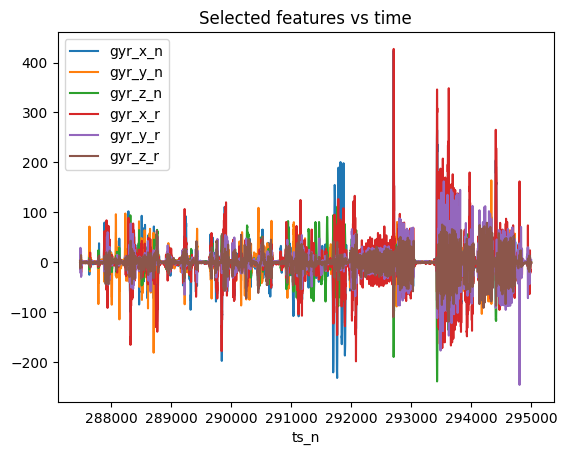

++++++ data preprocessing started +++++++++++++++++
+++++++++ haar_filters applied +++++++++++++++


<Figure size 640x480 with 0 Axes>

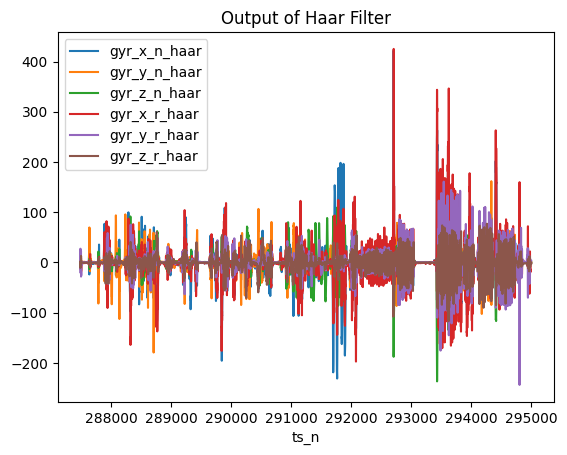

++++++++++++++ pca applied ++++++++++++++++++++


<Figure size 640x480 with 0 Axes>

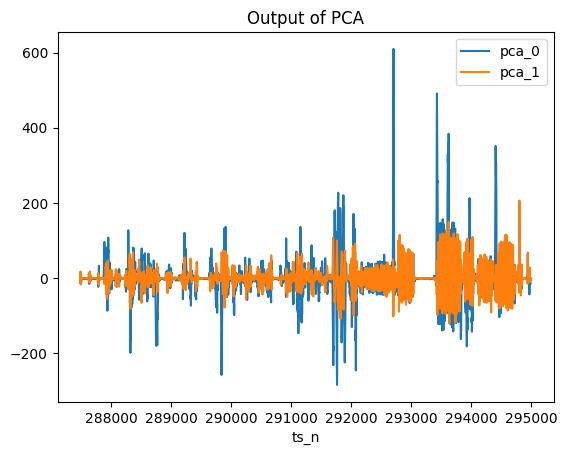

+++++++++ symbolic aggregation applied ++++++++


<Figure size 640x480 with 0 Axes>

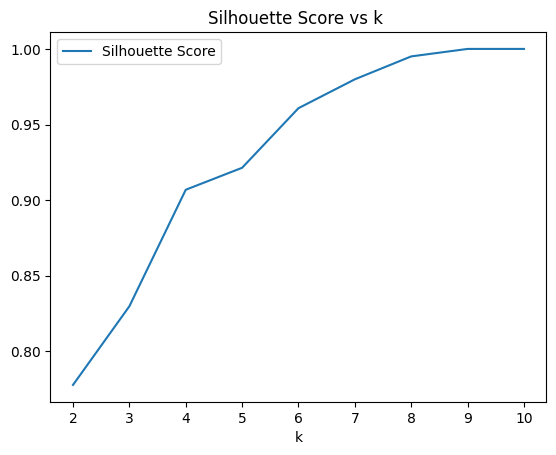

+++++++++++++ kmeans cluster trained ++++++++++


,gyr_x_n,gyr_y_n,gyr_z_n,gyr_x_r,gyr_y_r,gyr_z_r,ts_n,gyr_x_n_haar,gyr_y_n_haar,gyr_z_n_haar,gyr_x_r_haar,gyr_y_r_haar,gyr_z_r_haar,pca_0,pca_1,SAX_vector,cluster,label
0,-0.213623,2.777100,0.305176,-2.380371,1.922607,-0.335693,287479.0,0.062575,1.779716,0.025226,-1.686859,2.987979,-0.441573,-1.390940,-2.105969,0.157311,1,staan
1,0.488281,2.899170,0.152588,0.946045,12.573242,-0.061035,287480.0,0.062575,1.779716,0.025226,0.225343,12.224400,-0.441573,-1.420020,-6.251323,0.157311,1,staan
2,1.678467,2.136230,0.091553,17.913818,8.392334,-5.523682,287481.0,0.359572,1.779716,0.025226,16.193117,8.457705,-5.473997,11.236145,4.233606,0.157311,1,staan
3,1.190186,2.441406,0.122070,-1.007080,28.686523,-12.390137,287482.0,0.359572,1.779716,0.025226,-1.313568,27.337681,-10.926239,-3.145741,-13.446392,0.157311,1,staan
4,0.244141,1.556396,-0.030518,-14.831543,-5.950928,0.640869,287483.0,0.211073,1.372931,0.025226,-13.430924,-5.802746,0.397661,-8.357305,-3.181275,0.157311,1,staan


In [8]:
# user input 2
file_type = 'labeled' 

file_name = random.choice(labeled_files)
features = ['gyr_x_n','gyr_y_n','gyr_z_n','gyr_x_r','gyr_y_r','gyr_z_r']
y = 'gyr_x_n'
preprocesses = ['filter','pca','sax'] # write in order
model = 'k_means'
number_cluster = 5
data= user_input(file_type, file_name,features, preprocesses, model, number_cluster,y)
data.head()

In [ ]:
# user input_3
file_type = 'unlabeled' 
file_name = '063-COMBINED-2022-11-12-8-58-33-1668280845-v1.4.3+lucina-buzz.csv'
features = ['acc_x_n','acc_y_n','acc_z_n']
y = 'acc_x_n'
preprocesses = ['filter','pca','sax'] # write in order
model = 'k_means'
number_cluster = 5
data= user_input(file_type, file_name,features, preprocesses, model, number_cluster,y)
data.head()